## ANALYZING BANKING CUSTOMER CHURN

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Reading file

df = pd.read_csv(r"C:\Users\asus\Desktop\Data Science Sources\Datasets for project\Banking Customer Churn Dataset\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Cleaning

In [32]:
# Dropping unwanted columns

df = df.drop(columns = ["RowNumber","Surname"])


In [33]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
df.shape

(10000, 12)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [36]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [37]:
df.describe(include=object)

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [38]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df.nunique()

CustomerId         10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Exploratory Data Analysis

In [40]:
df.groupby(['Geography','Gender']).agg({'Age' : 'mean', 'CreditScore' : 'mean', 'Balance' : 'mean', 'EstimatedSalary' : 'mean'})

Age  CreditScore        Balance  EstimatedSalary
Geography Gender                                                        
France    Female  38.773994   649.185759   60322.670159     99564.252755
          Male    38.296404   650.064657   63546.284875    100174.252495
Germany   Female  40.154233   653.093881  119145.966471    102446.424124
          Male    39.424772   649.966565  120259.668222     99905.033959
Spain     Female  39.199265   651.769513   59862.092534    100734.107475
          Male    38.649135   650.992075   63352.833746     98425.687680

In [15]:
# -German Customers have higher average balance than those of France and Spain despite having similar average estimated salary. 
# -Within Germans also, Average Balance of Male customers exceeds those of Females despite their average estimated Salary being
#  slightly lower than Females

In [41]:
df.sort_values(by = "Balance", ascending = False).head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,15571958,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,15586674,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
1067,15599131,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
138,15594408,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
1533,15769818,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,15620268,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,15780212,592,France,Male,37,4,212692.97,1,0,0,176395.02,0


In [42]:
df.sort_values(by = "EstimatedSalary", ascending = False).head(10)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
9096,15762331,569,France,Male,37,9,178755.84,1,1,0,199929.17,0
8926,15709136,620,France,Male,28,8,0.00,2,1,1,199909.32,0
5958,15741719,540,France,Female,40,3,165298.12,1,0,1,199862.75,0
1378,15682834,715,Spain,Female,35,4,40169.88,2,1,1,199857.47,0
6402,15804211,719,France,Male,36,3,155423.17,1,1,1,199841.32,0
8088,15815656,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1
6125,15687913,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0


In [46]:
df.rename(columns = {'Exited':'Churned'}, inplace = True)

In [51]:
df['Churned'].replace({0:'No', 1:'Yes'}, inplace = True)

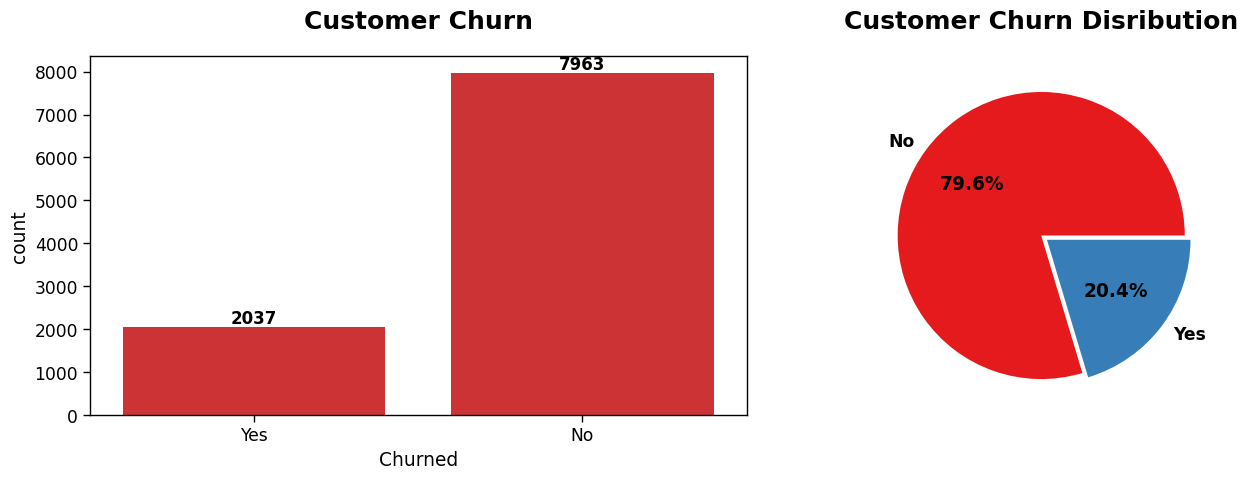

In [172]:
# Visualizing the churned customers

count = df["Churned"].value_counts()

plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x=df["Churned"])
ax.bar_label(ax.containers[0],fontweight="black",size=12)
plt.title("Customer Churn",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set1"), textprops={"fontweight":"black"},explode=[0,0.05])
plt.title("Customer Churn Disribution",fontweight="black",size=18,pad=20)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Total customer churn = 2037
# Customer Churn Percentage = 20.4 %

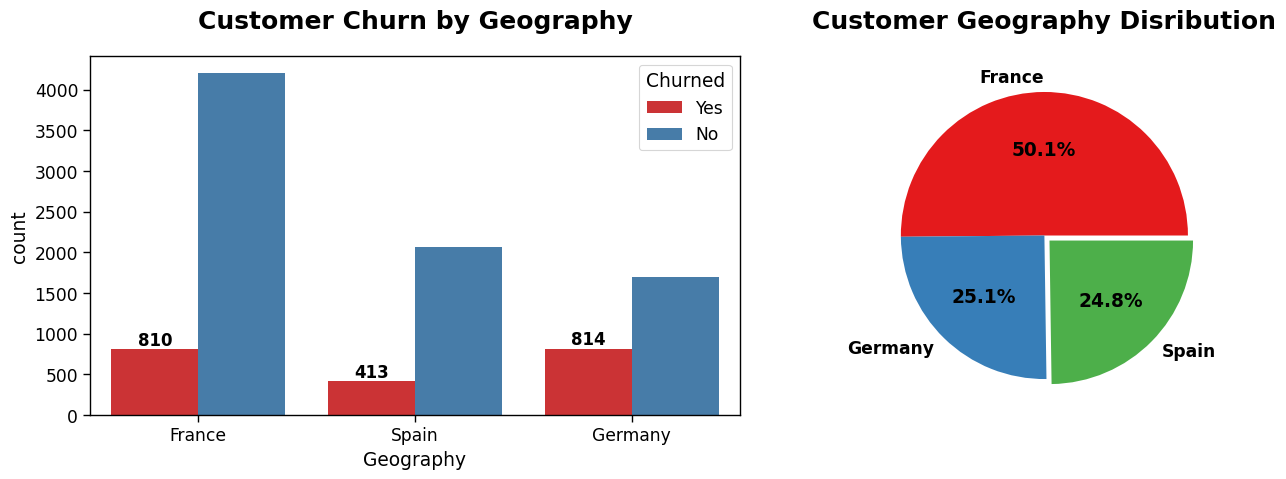

In [173]:
# Churn Distribution by geography

count = df["Geography"].value_counts()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="Geography", data=df, hue="Churned")
ax.bar_label(ax.containers[0],fontweight="black",size=12)
plt.title("Customer Churn by Geography",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set1"), textprops={"fontweight":"black"},explode=[0, 0,0.05])
plt.title("Customer Geography Disribution",fontweight="black",size=18,pad=20)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Geography.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Customers from France are almost twice of that from Spain and Germany.
# Despite having similar customer base in Spain and Germany, churn rate in Germany is almost twice of that of Spain.
# Churn rate of France and Spain are comparable almost 16% while Churn rate of Germany is almost twice around 32%.

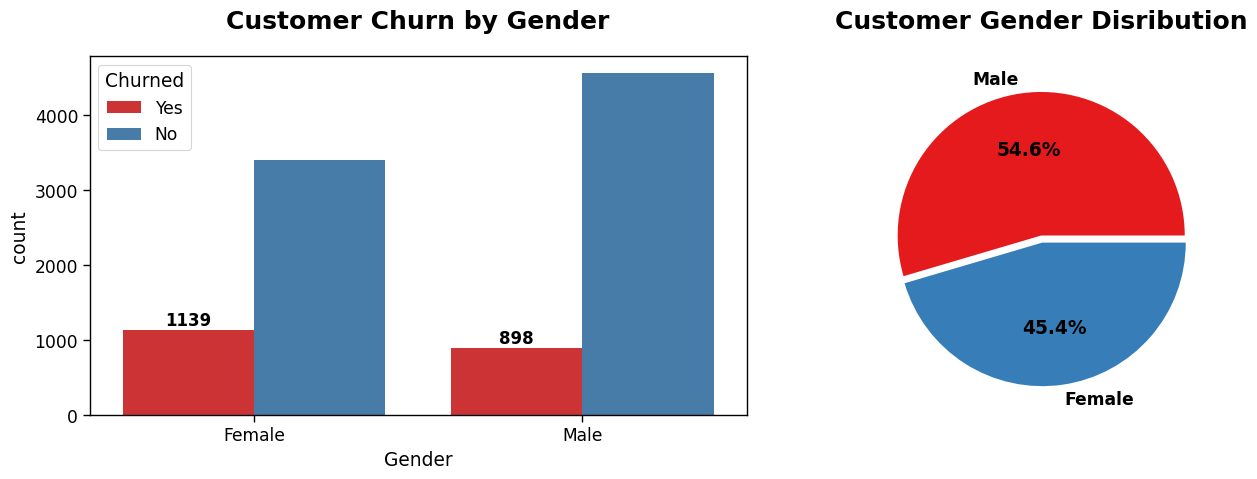

In [174]:
# Customer Churn by Gender

count = df["Gender"].value_counts()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="Gender", data=df, hue="Churned")
ax.bar_label(ax.containers[0],fontweight="black",size=12)
plt.title("Customer Churn by Gender",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set1"),
        textprops={"fontweight":"black"},explode=[0, 0.05])
plt.title("Customer Gender Disribution",fontweight="black",size=18,pad=20)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Gender.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Despite Male customers being slightly higher than female customers by 10%, churn rate of female customer is around 25% while that of male is 16%
# which is 9% higher than male churn rate.

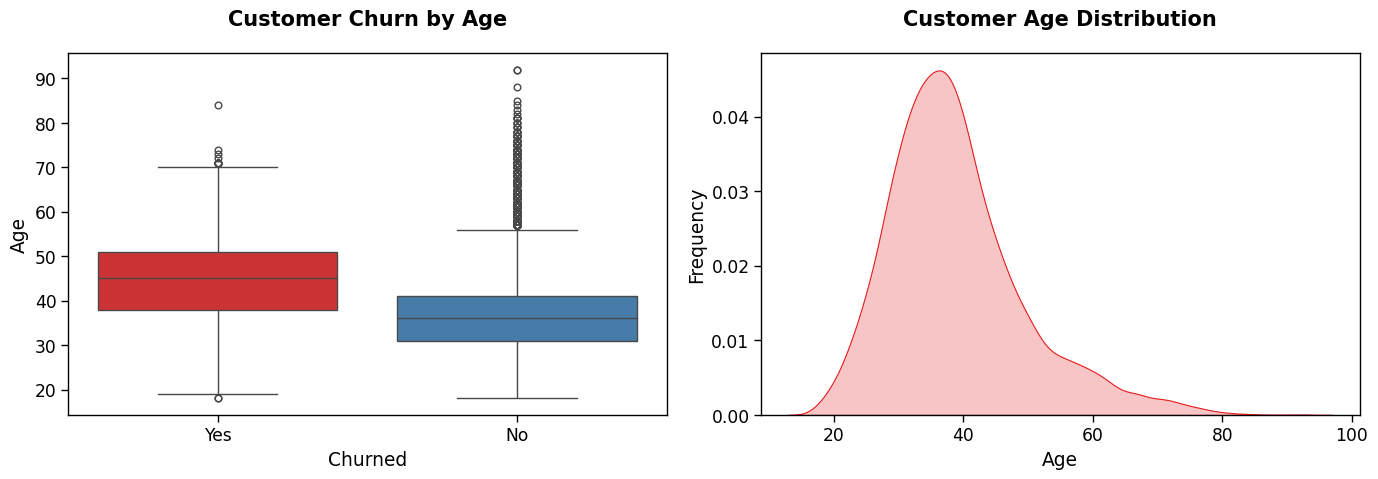

In [175]:
# Customer churn by Age

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x=df["Churned"],y=df["Age"],palette="Set1")
plt.title("Customer Churn by Age",fontweight="black",pad=20,size=15)

plt.subplot(1,2,2)
sns.kdeplot(df['Age'], fill=True, palette="Set1")
plt.title("Customer Age Distribution",fontweight="black",pad=20,size=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Age.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Most customers are middle aged belonging to the age group of 30-50 yrs.
# The mean age of churned customers is around 45 yrs while most of them lie in the age  bucket of 38-50 yrs.

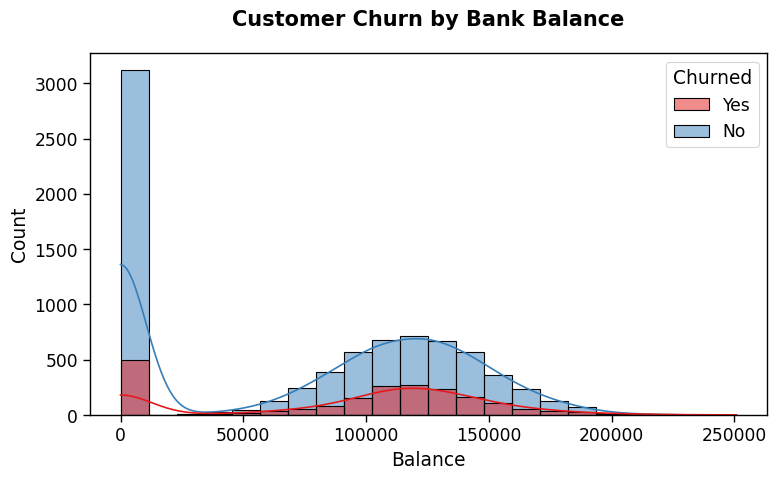

In [176]:
# Customer churn by Bank Balance

plt.figure(figsize=(8,5))
sns.histplot(x="Balance",hue="Churned",data=df,kde=True,palette="Set1")
plt.title("Customer Churn by Bank Balance",fontweight="black",pad=20,size=15)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Balance.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Huge no. of customers around 32% have 0 or very low account balance. These customers are slighly less likely to churn as compared to those 
# who have significant balance.
# Around 15% of low balance customers churned while 22% of customers with medium to high account balance churned.
# 23% of churned customers belonged to low balance category.

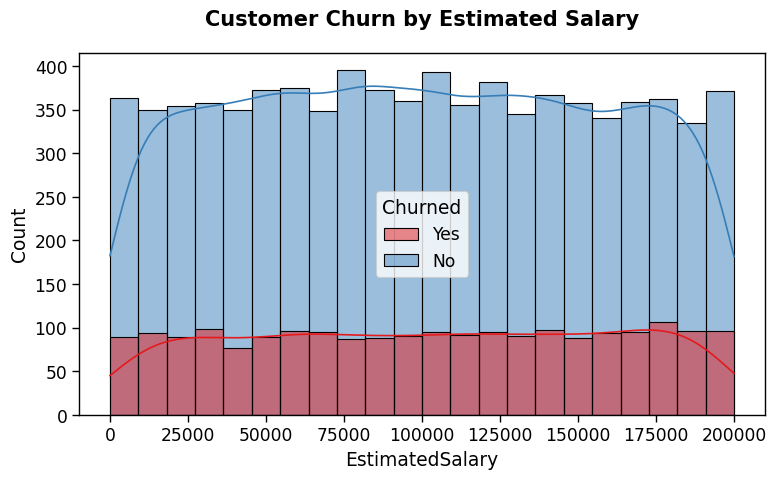

In [177]:
# Customer churn by Estimated Salary

plt.figure(figsize=(8,5))
sns.histplot(x="EstimatedSalary",hue="Churned",data=df,kde=True,palette="Set1")
plt.title("Customer Churn by Estimated Salary",fontweight="black",pad=20,size=15)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Salary.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Customers seems to be evenly distributed across estimated Salary ranges and so is their churn rate.
# Estimated Salary doesn't seems to have any significant impact on customer churn.

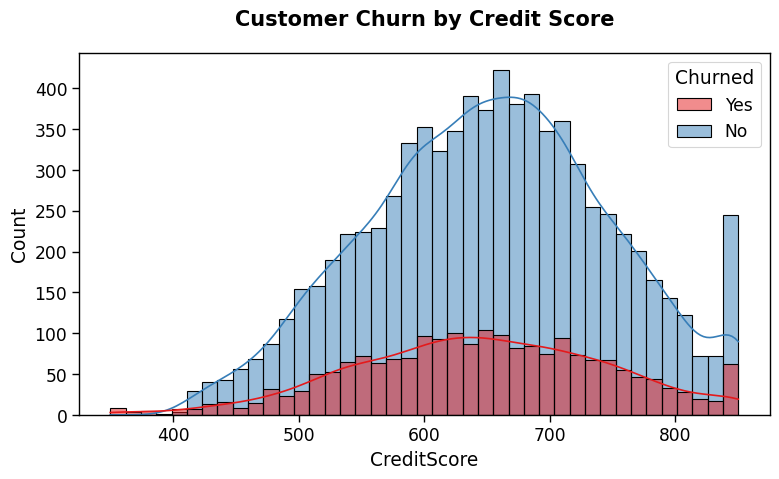

In [178]:
# Customer churn by Credit Score

plt.figure(figsize=(8,5))
sns.histplot(x="CreditScore",hue="Churned",data=df,kde=True,palette="Set1")
plt.title("Customer Churn by Credit Score",fontweight="black",pad=20,size=15)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Credit_Score.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# The median Credit Score of both churned and not churned customers are almost same so Credit Score doesn't seems to impact customer churn.

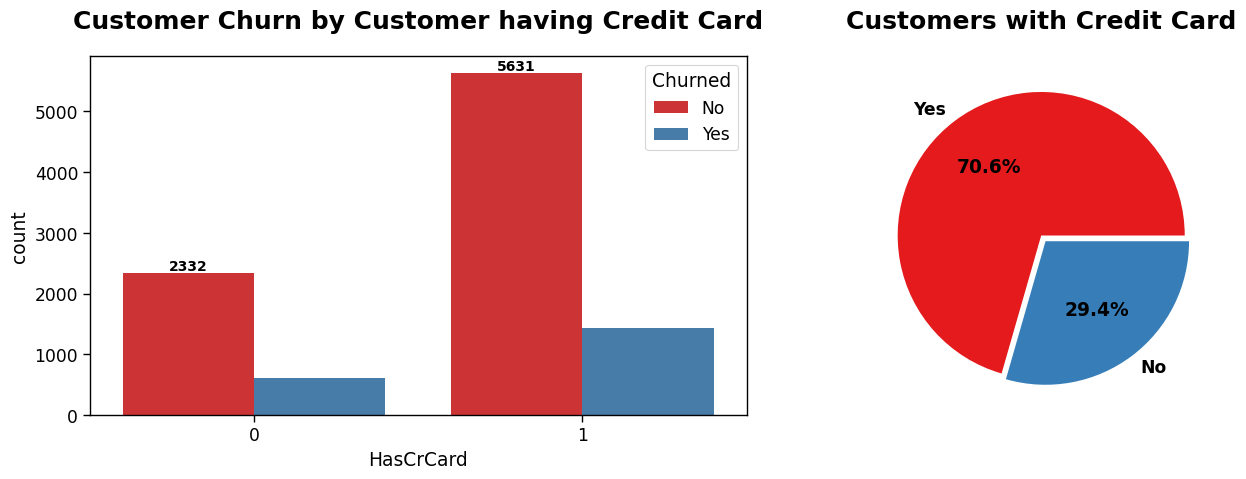

In [179]:
# Churn Distribution by Customer having Credit Card

count = df["HasCrCard"].value_counts()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="HasCrCard", data=df, hue="Churned")
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Customer Churn by Customer having Credit Card",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set1"), textprops={"fontweight":"black"},explode=[0, 0.05])
plt.title("Customers with Credit Card",fontweight="black",size=18,pad=20)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Credit_Card.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Around 70% of customers have Credit Card but the churn rate seems to be similar for both customers having credit card and those 
# without credit card. Thus having credit card doesn't affect customer churn.

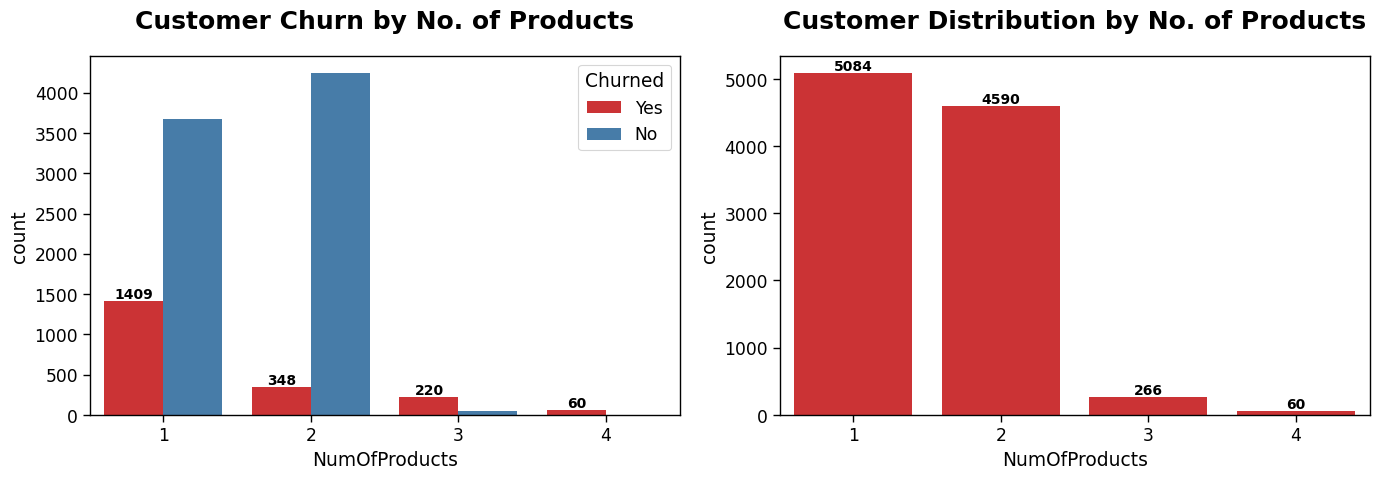

In [180]:
# Churn Distribution by No. of Products Customer has

count = df["HasCrCard"].value_counts()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="NumOfProducts", data=df, hue="Churned")
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Customer Churn by No. of Products",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
ax=sns.countplot(data=df, x="NumOfProducts")
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Customer Distribution by No. of Products",fontweight="black",size=18,pad=20)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Products.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Most of the customers have either 1 or 2 products while significant low number customers avail more than 2 products.
# Customers with more than 2 products are more likely to churn around 85%
# Customers having 2 products are least likely to churn (0.07%) while 27% of customers with 1 product churned.

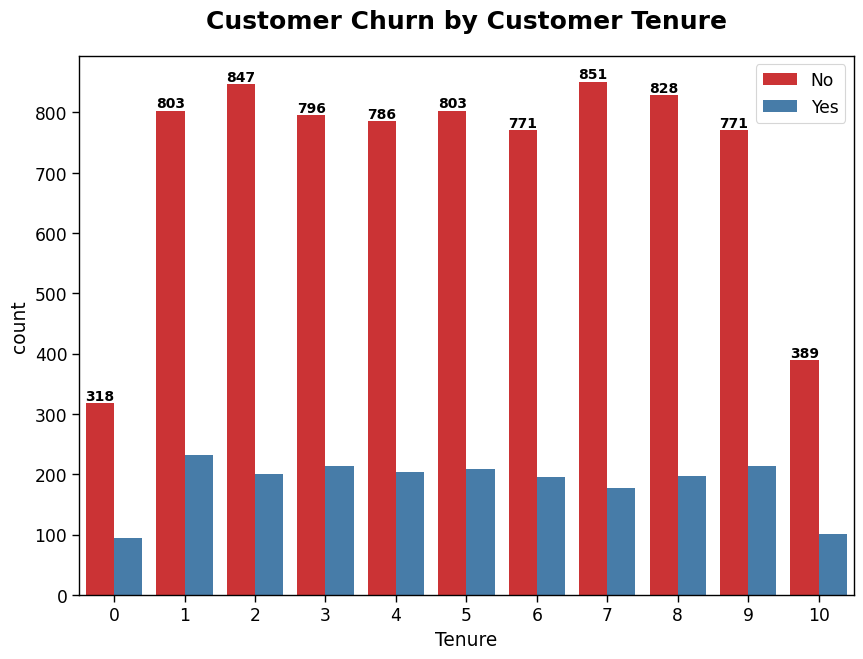

In [181]:
# Churn Distribution by Customer Tenure

plt.figure(figsize=(10,7))
ax = sns.countplot(x="Tenure", data=df, hue="Churned")
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Customer Churn by Customer Tenure",fontweight="black",size=18,pad=20)
plt.legend(loc=0)

plt.savefig('Plotted Graphs/Churn Tenure.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# There seems to be no impact of Tenure on customer churn as churned customers are almost evenly distributed across Tenures.

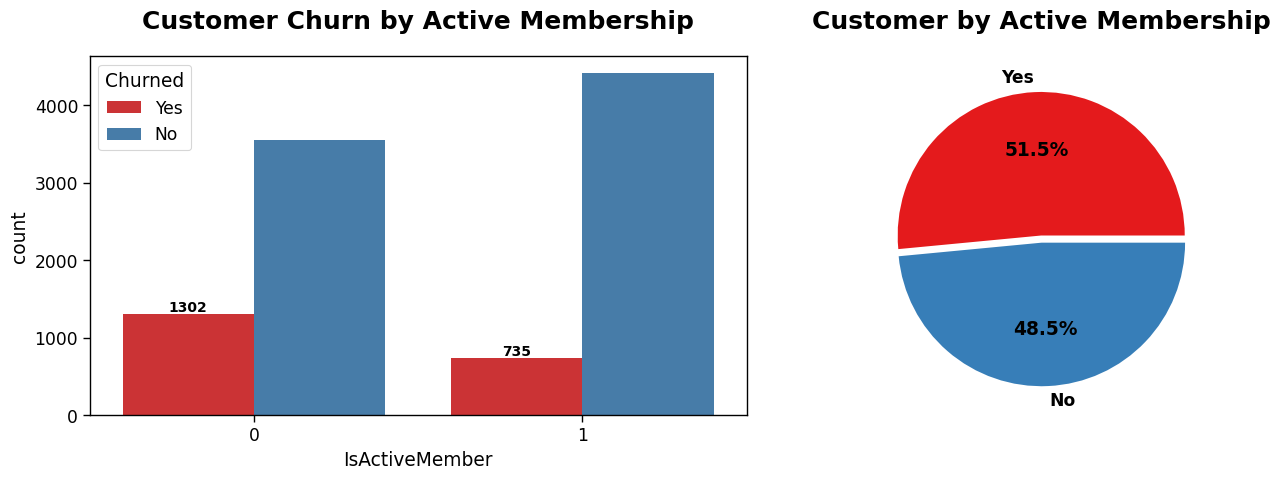

In [182]:
# Churn Distribution by Customer being Active Member

count = df["IsActiveMember"].value_counts()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(x="IsActiveMember", data=df, hue="Churned")
ax.bar_label(ax.containers[0],fontweight="black",size=10)
plt.title("Customer Churn by Active Membership",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=['Yes', 'No'], autopct="%1.1f%%",colors=sns.set_palette("Set1"), textprops={"fontweight":"black"},explode=[0, 0.05])
plt.title("Customer by Active Membership",fontweight="black",size=18,pad=20)
plt.tight_layout()

plt.savefig('Plotted Graphs/Churn Active_Mem.png', dpi=300, bbox_inches='tight')

plt.show()

In [169]:
# Active customers are slightly more than inactive customers.
# Almost 26% within active membership category churned while 14% within inactive membership category churned.
# Almost 7% of churned customers were active members while almost twice (13%) of churned customers were inactive members. Thus inactive customers are
# more likely to churn.


### Recommendations to reduce customer churn

In [ ]:
# The key factors that significantly impact customer churn are: No._of_Products, Age, IsActiveMember, Geography, Gender.

# Recommendations:-

# 1. Banks from Germany should analyze banking facilities and services of branches in Spain and adopt similar strategies and customer experience
#    to retain their customers as both countries have similar customer base.

# 2. Special services tailored for female customers, targeted marketing campaigns along with focus on enhancing their overall customer experience
#    can be developed to retain female customers.

# 3. Special incentives and schemes targeting customers in the age group of 40-50 yrs such as house loans, car loans, education loans at low rates
#    can be designed specifically catering to their need. 

# 4. Special offers, reward points and Loyalty programs for customers availing 2 banking products. Targeting and Convincing customers with 1 product
#    to have 2 products.
     
# 5. Engaging customers through regular communication and updates, launching Digital Banking Services along with assigning dedicated 
#    Customer Relationship Manager for each customer will help customers to remain active members.
